***
# 2.1 Categorical rhythm for Bird 26
### JX, 03/08/2022
***
    Bird26:
    LS110395.9.28.2017PalmRagonesi.WAV
    
***

## Specify Locations

In [1]:
from butcherbird.utils.paths import DATA_DIR

In [2]:
indv = "Bird26"

In [3]:
SAVE_LOC = DATA_DIR/'interim/raw_spectrogram/butcherbird_note_df.pickle'

## Load in Data

In [4]:
import pandas as pd

In [5]:
note_df = pd.read_pickle(SAVE_LOC)

In [6]:
indv_df = note_df[note_df['indv'] == indv].reset_index()

In [7]:
indv_df.head()

,index,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram
0,0,0,2.53,3.108940,0.578940,4,0,2.530000,2.565308,0.035308,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 1.046653124410034e-05, 2.781446748131873...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,0,2.53,3.108940,0.578940,4,1,2.582859,2.646042,0.063184,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -5.34641467372343e-06, -1.1688967129128...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,0,2.53,3.108940,0.578940,4,2,2.754858,2.877196,0.122338,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 2.4410663172602654e-05, 5.92200898084064...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,0,2.53,3.108940,0.578940,4,3,2.942109,3.108940,0.166831,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.00015404379157812003, -0.00030952889...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,1,7.66,9.269842,1.609842,6,0,7.660000,7.802573,0.142573,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 5.444124866051962e-05, 0.000182190384940...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Calculate Empirical Rhythm

In [8]:
import butcherbird.rhythm as rhythm
import seaborn as sns

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/rhythm.py:151: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [9]:
dyadic = rhythm.construct_rhythm_df(
    onsets = indv_df['note_strt'], 
    syntactic_units = indv_df['indv'], 
    expected_interval_range = [0, 1]
)

In [10]:
dyadic.head()

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
1897,0.036661,0.018330,Bird26,Bird26,Bird26,0.018330,0.036661,0.054991,0.666667,0.500000,1
4525,0.045403,0.011351,Bird26,Bird26,Bird26,0.011351,0.045403,0.056753,0.800000,0.250000,2
246,0.036661,0.020622,Bird26,Bird26,Bird26,0.020622,0.036661,0.057282,0.640000,0.562500,3
4125,0.039727,0.024593,Bird26,Bird26,Bird26,0.024593,0.039727,0.064321,0.617647,0.619048,4
3490,0.049186,0.018837,Bird26,Bird26,Bird26,0.018837,0.049186,0.068024,0.723078,0.382977,5


<AxesSubplot:xlabel='ratio_roeske', ylabel='Count'>

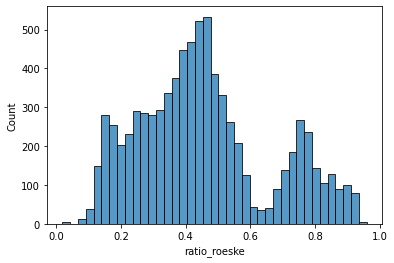

In [11]:
sns.histplot(dyadic['ratio_roeske'])

## Calculate Uniform Rhythm
> Uniform rhythm is calculated under the assumption that interval lengths are uniformly distributed between a minimum and maximum interval length.  

In [12]:
n = 1000

In [13]:
import numpy as np
import numpy.random as random

In [14]:
interval_min = np.min([dyadic['intervals1'].values, dyadic['intervals2']])
interval_max = np.max([dyadic['intervals1'].values, dyadic['intervals2']])

In [15]:
df_uni = []
for i in np.arange(0, n):
    interval1_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic))
    interval2_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic))
    df_uni.append(interval1_uni / (interval1_uni + interval2_uni))

In [16]:
uni_ratio = np.array(df_uni).flatten()

<AxesSubplot:ylabel='Count'>

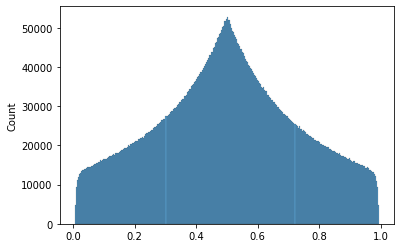

In [17]:
sns.histplot(uni_ratio)

## Calculate Shuffled IOI Rhythm
> Shuffled rhythm is calculated under the assumption that interval lengths are bootstrapped from the empirical distribution, but the consecutive order of intervals are shuffled. 

In [18]:
df_sf = []
for i in np.arange(0, n):
    interval1_sf = dyadic['intervals1'].sample(frac = 1, replace = True).values
    interval2_sf = dyadic['intervals2'].sample(frac = 1, replace = True).values
    df_sf.append(interval1_sf / (interval1_sf + interval2_sf))

In [19]:
sf_ratio = np.array(df_sf).flatten()

<AxesSubplot:ylabel='Count'>

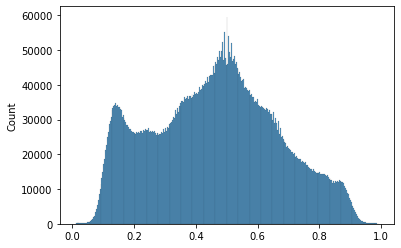

In [20]:
sns.histplot(sf_ratio)

## Calculate Shuffled Note + Gap
> Shuffled Note + Gap rhythm is calculated under the assumption that note length and inter-note gaps are independently shuffled.

In [21]:
import numpy.random as random

In [22]:
# find all gaps and their positions
grand_gaps = []

for phrase_nb in np.unique(indv_df['phrase_nb']):
    ## pull out each phrase
    phrase = indv_df[indv_df['phrase_nb'] == phrase_nb]

        ## find all internote gaps
    gaps = phrase['note_strt'][1:].values - phrase['note_end'][:-1].values
    grand_gaps.append(gaps)

In [23]:
grand_gaps = np.hstack(grand_gaps)

In [24]:
df_lg = []

for i in np.arange(0, n):
    ## randomly shuffle gaps
    random.shuffle(grand_gaps)
    ## add to randomly shuffled lengths
    shuffled_lg = grand_gaps + indv_df['note_len'].sample(n = len(grand_gaps), replace = True).values
    
    shuffled_lg_i1 = shuffled_lg[:-1]
    shuffled_lg_i2 = shuffled_lg[1:]
    
    df_lg.append(shuffled_lg_i1 / (shuffled_lg_i1 + shuffled_lg_i2))

In [25]:
lg_ratio = np.hstack(df_lg)

<AxesSubplot:ylabel='Count'>

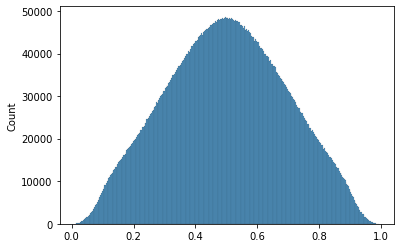

In [26]:
sns.histplot(lg_ratio)

## Draw Figure

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from butcherbird.utils.paths import FIGURE_DIR

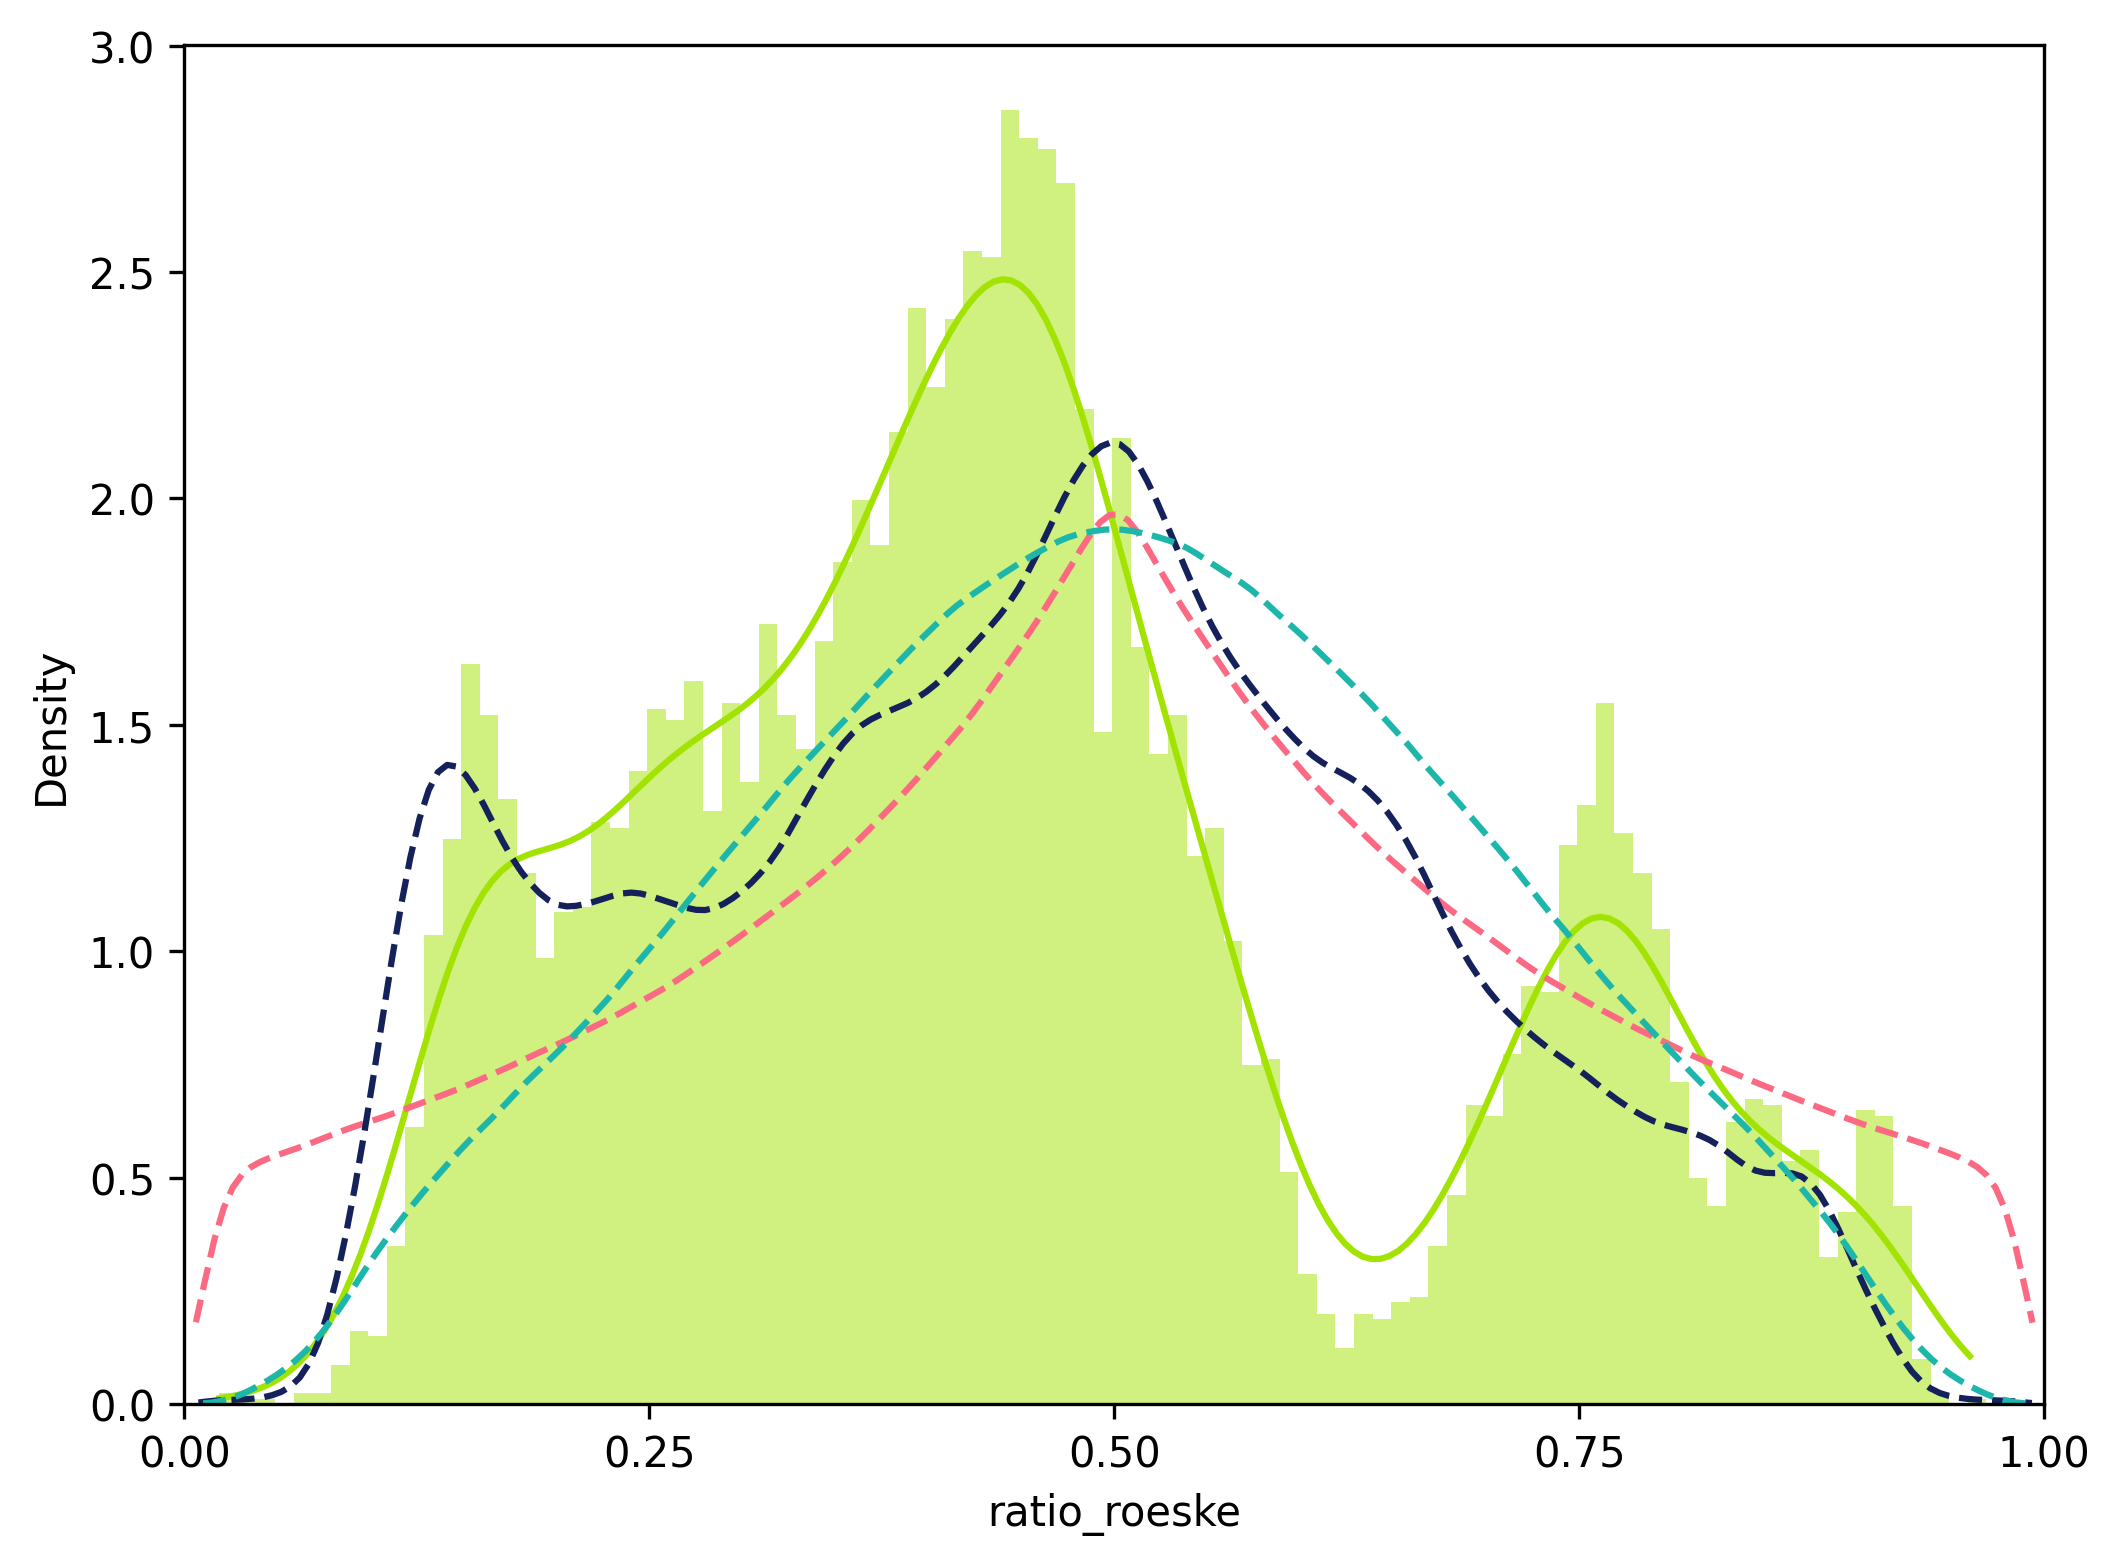

In [28]:
figure(figsize = (8, 6), dpi = 300)

plt.rcParams['patch.edgecolor'] = 'none'

fig = sns.histplot(
    x = dyadic['ratio_roeske'],
    binwidth = 0.01,
    stat = 'density',
    color = '#A3E301',
    fill = '#A3E301',
    kde = True,
)

uni = sns.histplot(
    x = uni_ratio,
    stat = 'density',
    alpha = 0,
    color = '#FC6983',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

sf = sns.histplot(
    x = sf_ratio,
    stat = 'density',
    alpha = 0,
    color = '#15215B',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

lg = sns.histplot(
    x = lg_ratio,
    stat = 'density',
    alpha = 0,
    color = '#1DB6AB',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

ax = plt.gca()
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.25, 0.25))

# save
figname = 'fig1_' + 'categorical_rhythm_' + indv + '.svg'
plt.savefig(FIGURE_DIR/'categorical_rhythm'/figname)

## Calculate Hopkins Statistics and confidence intervals

In [29]:
from butcherbird.rhythm import hopkins
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed

In [30]:
h_iterations = 100
shuffle_iterations = 100
n_jobs = 36

In [31]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [32]:
## empirical
SDoH = []

for i in tqdm(range(0, h_iterations)):
    SDoH.append(hopkins(dyadic[['ratio_roeske']]))
    
## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH)

  0%|          | 0/100 [00:00<?, ?it/s]

(0.9248030710108779, 0.9225138469027302, 0.9270922951190256)

In [33]:
## uni
SDoH_uni = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_uni = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_uni)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_uni)

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.7025819507964156, 0.701900766252647, 0.7032631353401843)

In [34]:
## shuffle
SDoH_shuffle = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_shuffle = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_sf)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_shuffle)

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.9263654962179518, 0.9247938830105985, 0.9279371094253052)

In [35]:
## lg shuffle
SDoH_lg = []

with Parallel(n_jobs= n_jobs) as parallel:
    SDoH_lg = parallel(
        delayed(hopkins)(
            pd.DataFrame(sample)
        )
        for sample in tqdm(df_lg)
    )

## take mean of sampling distribution of Hopkins as best estimate
mean_confidence_interval(SDoH_lg)

  0%|          | 0/1000 [00:00<?, ?it/s]

(0.8654997022194911, 0.8637586703158592, 0.8672407341231231)

## Timescale Estimation

Timescale is estimated as mean inter-onset interval

In [36]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [37]:
sequential_note = dyadic.sort_index()
sequential_note

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
0,0.052859,0.172000,Bird26,Bird26,Bird26,0.052859,0.172000,0.224858,0.235075,0.307318,616
1,0.172000,0.187250,Bird26,Bird26,Bird26,0.172000,0.187250,0.359250,0.478775,0.918556,2955
4,0.225811,0.304189,Bird26,Bird26,Bird26,0.225811,0.304189,0.530000,0.426059,0.742340,5322
5,0.304189,0.370000,Bird26,Bird26,Bird26,0.304189,0.370000,0.674189,0.451192,0.822131,6673
6,0.370000,0.446981,Bird26,Bird26,Bird26,0.370000,0.446981,0.816981,0.452887,0.827776,7897
...,...,...,...,...,...,...,...,...,...,...,...
10859,0.260000,0.430000,Bird26,Bird26,Bird26,0.260000,0.430000,0.690000,0.376812,0.604651,6895
10860,0.430000,0.200000,Bird26,Bird26,Bird26,0.200000,0.430000,0.630000,0.682540,0.465116,6095
10861,0.200000,0.152862,Bird26,Bird26,Bird26,0.152862,0.200000,0.352862,0.566794,0.764308,2872
10862,0.152862,0.203257,Bird26,Bird26,Bird26,0.152862,0.203257,0.356119,0.429244,0.752061,2913


In [38]:
n_IOI = list(sequential_note['intervals1'].values)
n_IOI.append(sequential_note['intervals2'].values[-1])

In [39]:
mean_confidence_interval(n_IOI, confidence=0.95)

(0.21432794306102682, 0.2115623606165481, 0.21709352550550554)